<a href="https://colab.research.google.com/github/AnastasiaBlack/w20061036_Anastasiia_Ilina_Landmines_Detection_Research/blob/main/colabFiles/Transform_GroundTruth_Xml_To_TXT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In order to create the unified ground truth .txt files that can be used both for YOLO and SSD models, this step needs to be done to transform the values from Pascal VOC (xml) format to a .txt file in format "<class_name> <left> <top> <right> <bottom>" using Python

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import xml.etree.ElementTree as ET

# Path to the 'test' folder containing XML files
xml_folder_path = "/content/drive/MyDrive/University/Research_Module/dataset/Phase2_PascalVOC.v4i.voc/test"

# Path to the output 'txt_metrics' folder
output_folder_path = os.path.join(xml_folder_path, "txt_metrics")
os.makedirs(output_folder_path, exist_ok=True)

# Iterate over all XML files in the 'test' folder
for xml_file_name in os.listdir(xml_folder_path):
    if xml_file_name.endswith(".xml"):
        # Construct the full path to the XML file
        xml_file_path = os.path.join(xml_folder_path, xml_file_name)

        try:
            # Parse the XML file
            tree = ET.parse(xml_file_path)
            root = tree.getroot()

            # Generate the output file path with the same name as the input XML file but with a ".txt" extension
            output_file_path = os.path.join(output_folder_path, os.path.splitext(xml_file_name)[0] + ".txt")

            # Open the output file for writing
            with open(output_file_path, "w") as f:
                # Iterate over all objects in the XML file
                for obj in root.findall(".//object"):
                    class_name = obj.find("name").text
                    xmin = int(obj.find("bndbox/xmin").text)
                    xmax = int(obj.find("bndbox/xmax").text)
                    ymin = int(obj.find("bndbox/ymin").text)
                    ymax = int(obj.find("bndbox/ymax").text)

                    # Write each object to the text file
                    f.write(f"{class_name} {xmin} {ymin} {xmax} {ymax}\n")

            print(f"Values written to {output_file_path}")

        except ET.ParseError as e:
            print(f"Error parsing XML file {xml_file_name}: {e}")
        except Exception as e:
            print(f"An error occurred for XML file {xml_file_name}: {e}")


Values written to /content/drive/MyDrive/University/Research_Module/dataset/Phase2_PascalVOC.v4i.voc/test/txt_metrics/726_Zone_5_Sruface_Mine_0cm_depth__6-9m_TemperatureInCenter__31A-C_jpg.rf.9ae2bd4f260eddf068833261614c3b6b.txt
Values written to /content/drive/MyDrive/University/Research_Module/dataset/Phase2_PascalVOC.v4i.voc/test/txt_metrics/143_Zone_1_Mine_1cm_depth__3-9m_TemperatureInCenter__29-C_jpg.rf.f93d7e227911dc912af7f9a39de132de.txt
Values written to /content/drive/MyDrive/University/Research_Module/dataset/Phase2_PascalVOC.v4i.voc/test/txt_metrics/146_Zone_1_Mine_1cm_depth__7-0m_TemperatureInCenter__27-C_jpg.rf.5ef209492de2a38a11ee3084df2023f3.txt
Values written to /content/drive/MyDrive/University/Research_Module/dataset/Phase2_PascalVOC.v4i.voc/test/txt_metrics/757_Zone_8_Mine_5cm_depth__1-3m_TemperatureInCenter__33A-C_jpg.rf.8bbe0348bc5c660fa781a713f1c99583.txt
Values written to /content/drive/MyDrive/University/Research_Module/dataset/Phase2_PascalVOC.v4i.voc/test/txt_

Save .txt files as archive

In [ ]:
import os
import zipfile

# Path to the folder containing the .txt files
txt_folder_path = "/content/drive/MyDrive/University/Research_Module/dataset/Phase2_PascalVOC.v4i.voc/test/txt_metrics"

# Path to the output .zip file
zip_file_path = "/content/phase2_txt_metrics_archive.zip"

# Create a ZipFile object for writing to the archive
with zipfile.ZipFile(zip_file_path, 'w') as zipf:
    # Iterate over all .txt files in the folder
    for txt_file_name in os.listdir(txt_folder_path):
        if txt_file_name.endswith(".txt"):
            # Construct the full path to the .txt file
            txt_file_path = os.path.join(txt_folder_path, txt_file_name)

            # Add the .txt file to the zip archive
            zipf.write(txt_file_path, os.path.basename(txt_file_path))

print(f"All .txt files in {txt_folder_path} are saved in {zip_file_path}")


All .txt files in /content/drive/MyDrive/University/Research_Module/dataset/Phase2_PascalVOC.v4i.voc/test/txt_metrics are saved in /content/phase2_txt_metrics_archive.zip


In [ ]:
# Save zip with .txt labels to the local computer

from google.colab import files

# Download the .zip file to your local machine
files.download(zip_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import os
import xml.etree.ElementTree as ET

# Specify the path to the XML file
xml_file_path = "/content/94_Zone_7_Mine_5cm_depth__2-3m_TemperatureInCenter__28-C_jpg.rf.7e129ccba5cb7c9c7d934da9e1b5e64b.xml"

# Read XML content from the file
with open(xml_file_path, "r") as file:
    xml_string = file.read()

# Parse the XML string
root = ET.fromstring(xml_string)

# Extract values
class_name = root.find(".//object/name").text
xmin = int(root.find(".//object/bndbox/xmin").text)
xmax = int(root.find(".//object/bndbox/xmax").text)
ymin = int(root.find(".//object/bndbox/ymin").text)
ymax = int(root.find(".//object/bndbox/ymax").text)

# Generate the output file path with the same name as the input XML file but with a ".txt" extension
output_file_path = os.path.splitext(xml_file_path)[0] + ".txt"

# Write to the text file
with open(output_file_path, "w") as f:
    f.write(f"{class_name} {xmin} {ymin} {xmax} {ymax}")

print(f"Values written to {output_file_path}")


Values written to /content/94_Zone_7_Mine_5cm_depth__2-3m_TemperatureInCenter__28-C_jpg.rf.7e129ccba5cb7c9c7d934da9e1b5e64b.txt


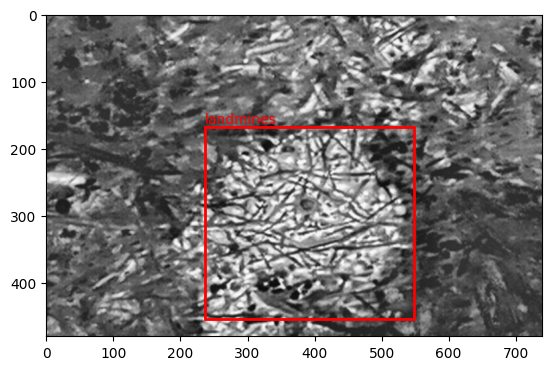

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Specify the path to the .txt file
txt_file_path = "/content/drive/MyDrive/University/Research_Module/dataset/Phase2_PascalVOC.v4i.voc/test/txt_metrics/1013_Zone_7_Mine_5cm_depth__2-0m_TemperatureInCenter__45A-C_jpg.rf.5575b3cea195cb74477378bd8b8c3284.txt"

# Read values from the .txt file
with open(txt_file_path, "r") as file:
    line = file.readline().strip().split()
    class_name, xmin, ymin, xmax, ymax = line

# Convert string values to integers
xmin, ymin, xmax, ymax = map(int, [xmin, ymin, xmax, ymax])

# Construct the image path based on the .txt file's name
image_name = os.path.splitext(os.path.basename(txt_file_path))[0]
image_folder = os.path.join(os.path.dirname(txt_file_path), "..")  # Go one level up to 'test'
image_path = os.path.join(image_folder, f"{image_name}.jpg")

# Load the image corresponding to the .txt file
image = plt.imread(image_path)

# Create a figure and axis
fig, ax = plt.subplots()

# Display the image
ax.imshow(image)

# Create a Rectangle patch
bbox = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor="r", facecolor="none")

# Add the bounding box to the plot
ax.add_patch(bbox)

# Add class name as text
ax.text(xmin, ymin - 5, class_name, color="r")

# Show the plot
plt.show()
